Exercise I
--------------

    a) Plot muon or neutrino spectrum as a function of the zenith angle and save plot as png files
    opt) compare the zenith denpendence for two interaction models 'SIBYLL-2.3c' and 'EPOS-LHC' for example
    
We will plot the total fluxes of muons. Muons carry the tags 'total_mu+ and 'total_mu-'. You can also plot the neutrino fluxes with 'total_numu' and 'total_antinumu', respectively.

In [2]:
#usual imports and jupyter setup
%load_ext autoreload
%matplotlib inline
%autoreload 2
import os
import matplotlib.pyplot as plt
import numpy as np

# Path to MCEq. Can be uncommented if in PYTHONPATH
import sys
sys.path.append('../MCEq/')

#import solver related modules
from MCEq.core import MCEqRun
from mceq_config import config
#import primary model choices
import CRFluxModels as pm

Initialize main class as user interface
---------------------------------
``MCEqRun`` is main control class. It glues together the involved models and is the **recommended and supported way** to interact with the code.

In [3]:
mceq_run = MCEqRun(

#provide the string of the interaction model (browse ./data/ folder for what else is supported)
interaction_model='SIBYLL2.3c',
    
#primary cosmic ray flux model. We will compute the cosmic ray flux in the atmosphere
primary_model = (pm.HillasGaisser2012, "H3a"),

# Default zenith angle in degrees. 0=vertical, 90=horizontal
theta_deg=0.0,
    
#expand the rest of the options from mceq_config.py
**config
)

InteractionYields::_load(): Looking for /home/isapp2018/work/MCEqExercise/MCEq/data/SIBYLL23C_yields_compact_ledpm.bz2
DecayYields:_load():: Loading file /home/isapp2018/work/MCEqExercise/MCEq/data/compact_decay_tables.ppd

Hadrons and stable particles:

"p", "p-bar", "n-bar", "n"

Mixed:

"pi-", "pi+", "K0L", "K-", "K+", "Lambda0", "Lambda0-bar", "K0S", 
"D+", "D-", "Ds+", "Ds-", "D0", "D0-bar"

Resonances:



Leptons:

"e-", "nue", "numu", "nutau", "gamma", "antinutau", "antinumu", "antinue", 
"e+", "mu-", "mu+"

Aliases:
"obs_numu", "obs_nutau", "pr_antinutau", "pr_antinumu", "pr_antinue", "obs_antinue", "k_nue", "k_numu", 
"k_nutau", "pi_antinutau", "pi_antinue", "pi_antinumu", "pi_nue", "pi_numu", "pi_nutau", "k_antinutau", 
"k_antinumu", "k_antinue", "obs_nue", "pr_nue", "pr_numu", "pr_nutau", "obs_antinutau", "obs_antinumu", 
"k_mu-", "obs_mu-", "pr_mu+", "pi_mu+", "pi_mu-", "k_mu+", "pr_mu-", "obs_mu+"

Total number of species: 61
MCEqRun::set_interaction_model():  SIBYLL23C
In

__________

If everything succeeds than the last message should be something like

`MCEqRun::set_primary_model():  HillasGaisser2012 H3a`.

Define variables and angles
-------------------------

Modify the `theta_list` to incude more zenith angles

In [4]:
#Power of energy to scale the flux (the results will be returned as E**mag * flux)
mag = 3

#obtain energy grid (fixed) of the solution for the x-axis of the plots
e_grid = mceq_run.e_grid

#Dictionary for results
flux = {}

#Define a zenith angle, counted positively from vertical direction. Theta = 0. means vertical, theta = 90. horizontal
theta_list = [60.]

Modify the computation below to also store the *conventional* and the *prompt* fluxes

In [6]:
total_flux_zen = []
for zenith_angle in theta_list:
    
    #Set the zenith angle
    mceq_run.set_theta_deg(zenith_angle)
    
    #Run the solve cascade equations
    mceq_run.solve()
    
#     #_conv means conventional (mostly pions and kaons)
#     mu_conv = (mceq_run.get_solution('conv_mu+', mag)
#                + mceq_run.get_solution('conv_mu-', mag))

#     # _pr means prompt (the mother of the muon had a critical energy
#     # higher or equal to that of a D meson. Includes all charm and direct resonance
#     # contribution)
#     mu_pr = (mceq_run.get_solution('pr_mu+', mag)
#              + mceq_run.get_solution('pr_mu-', mag))

#     # total means conventional + prompt
#     mu_total = (mceq_run.get_solution('total_mu+', mag)
#                 + mceq_run.get_solution('total_mu-', mag))
    
    total_flux_zen.append((mceq_run.get_solution('total_mu+', mag)
                           + mceq_run.get_solution('total_mu-', mag)))

MCEqRun::set_theta_deg():  60.0
Theta selection correponds to cached value, skipping calc.
MCEqRun::_forward_euler(): Solver will perform 727 integration steps.
Performance:   1.29ms/iteration

MCEqRun::_forward_euler(): time elapsed during integration: 0.938199996948 sec


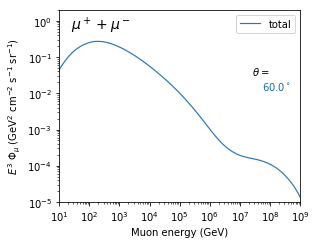

In [7]:
# This is just for fancy colors
from matplotlib import cm
from matplotlib.colors import Normalize
norm = Normalize(-50,90)
s_m = cm.ScalarMappable(cmap=cm.Blues, norm=norm)
s_m.set_array([])

# Setup canvas and some options
fig, ax = plt.subplots(1,1,figsize=(4.5,3.5))
st = {'lw':1.2, 'alpha':0.9}

#Loop over the angles defined in theta_list (above)
for it, t in enumerate(theta_list):
    #Plot the total flux
    ax.loglog(mceq_run.e_grid, total_flux_zen[it],color=s_m.to_rgba(t),
              label='total' if it == 0 else '_nolabel_',ls='-',**st)
    
    # Modify these lines to plot the conventional and prompt flux separtely
    
#     ax.loglog(mceq_run.e_grid, XXX_flux_zen[it],color=s_m.to_rgba(t),
#               label='conventional' if t == 90. else '_nolabel_',ls='-.',**st)
#     ax.loglog(mceq_run.e_grid, XXX_flux_zen[it],color=s_m.to_rgba(t),
#               label='prompt' if t == 90. else '_nolabel_',ls='--',**st)

ax.set_ylabel(r"$E^3\ \Phi_{\mu}$ (GeV$^{2}$ cm$^{-2}$ s$^{-1}$ sr$^{-1}$)")
ax.set_xlabel(r'Muon energy (GeV)')

ax.text(0.8,0.66,r'$\theta =$',color='k',transform = ax.transAxes)
for it, t in enumerate(theta_list):
    ax.text(0.84,0.58 - it*0.072,r'{0:3.1f}$^\circ$'.format(t), 
            color=s_m.to_rgba(t),transform = ax.transAxes)
ax.text(0.05,0.9,r'$\mu^+ + \mu^-$',color='k',fontsize=14,transform = ax.transAxes)
ax.legend(loc='upper right')
ax.set_xlim(1e1,1e9)
ax.set_ylim(1e-5,2e0)

plt.tight_layout()

plt.savefig('muon_angular_spectrum.png',dpi=300)

## Changing the interaction model

Now change the interaction model and produce another set of plots (or if you know Python well, overlay both models with different colors).

The below function allows you to switch the interaction models.

In [28]:
# mceq_run.set_interaction_model('SIBYLL2.3c')
mceq_run.set_interaction_model('EPOS-LHC')

MCEqRun::set_interaction_model():  EPOSLHC
InteractionYields::_load(): Looking for /mnt/c/Users/afedy/OneDrive/devel/git/MCEq/data/EPOSLHC_yields_compact_ledpm.bz2
MCEqRun::_init_default_matrices():Start filling matrices. Skip_D_matrix = True
MCEqRun::_convert_to_sparse():Converting to sparse (CSR) matrix format.
C Matrix info:
    density    : 2.65%
    shape      : 5368 x 5368
    nnz        : 763345
D Matrix info:
    density    : 1.10%
    shape      : 5368 x 5368
    nnz        : 317709
MCEqRun::_init_default_matrices():Done filling matrices.
